## EDA (탐색적 데이터 분석)
- 데이터에서 분석에 필요한 여러가지 통계량을 계산하고, 시각화를 통해서 이를 확인하는 작업
- 나만의 EDA process를 구축하는 것이 중요

    1. 해당 데이터를 보고 어떤 인사이트를 이끌어내고 싶은지? (분석의 목표)
    2. 데이터에 대한 여러가지 특성을 어떻게 파악하는지? (분석 방법론)
    3. 지금까지 배운 오픈소스 라이버르리들을 사용하여 EDA를 어떻게 수행하는지? (분석을 위한 프로그래밍)

## Starbucks Survey

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
transcript = pd.read_csv("./starbucks/transcript.csv").drop(columns=['Unnamed: 0'])
profile = pd.read_csv("./starbucks/profile.csv").drop(columns=['Unnamed: 0'])
portfolio = pd.read_csv("./starbucks/portfolio.csv").drop(columns=['Unnamed: 0'])

In [8]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [9]:
profile

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [10]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [18]:
# 데이터 전처리
nulls = profile[profile.isnull().any(axis = 1)]
nulls

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [22]:
nulls.gender.value_counts()
nulls.income.value_counts()
nulls.age.value_counts()
nulls.id.nunique()

2175

In [23]:
profile = profile.dropna()
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


In [24]:
profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format="%Y%m%d")
profile

C:\Users\94dng\AppData\Local\Temp\ipykernel_7396\254816120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format="%Y%m%d")


,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [25]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


In [27]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

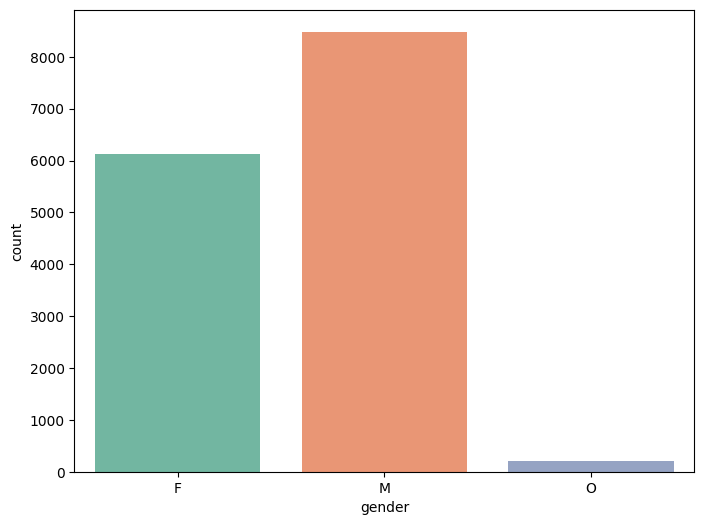

In [26]:
# 성별에 관한 분석
plt.figure(figsize = (8, 6))
sns.countplot(data = profile, x = 'gender', palette = 'Set2')
plt.show()

In [29]:
pd.pivot_table(data = profile, index = 'gender', values = 'income')

,income
gender,
F,71306.412139
M,61194.601603
O,63287.735849


In [36]:
profile.age.value_counts()

58     408
53     372
51     363
59     359
54     359
      ... 
100     12
96       8
98       5
101      5
99       5
Name: age, Length: 84, dtype: int64

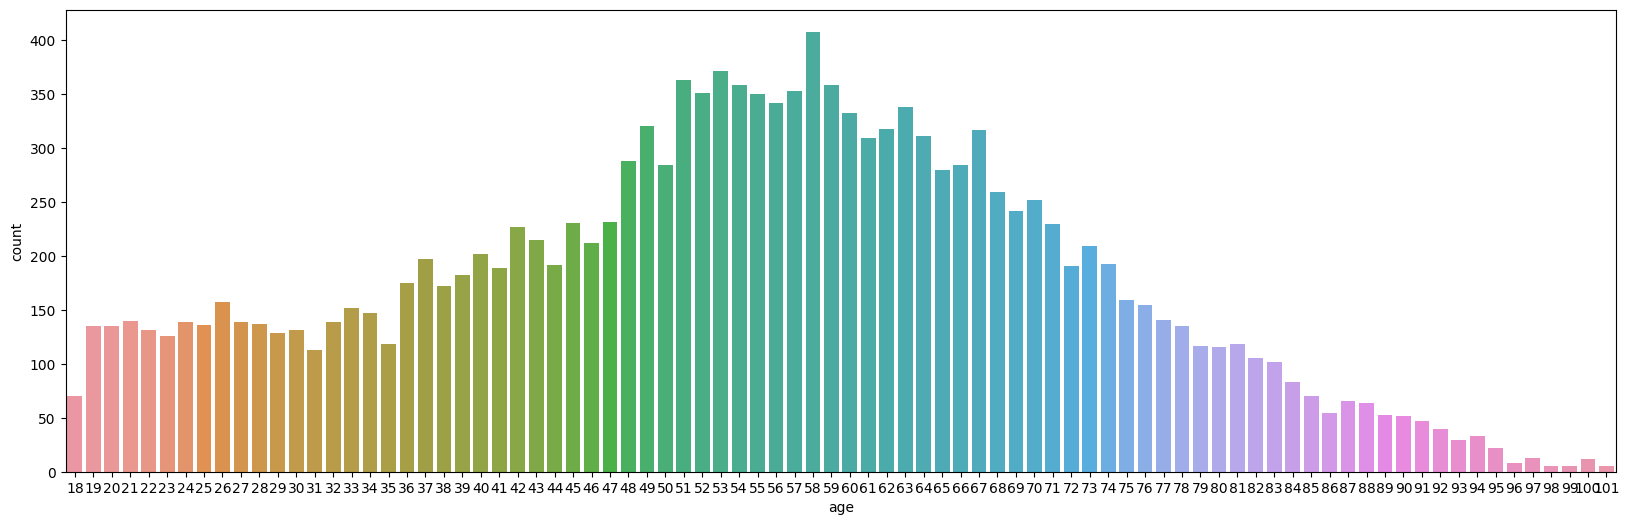

In [37]:
# 나이에 대한 분석
plt.figure(figsize = (20, 6))
plt.xlim(10, 100)
sns.countplot(data = profile, x = 'age')
plt.show()

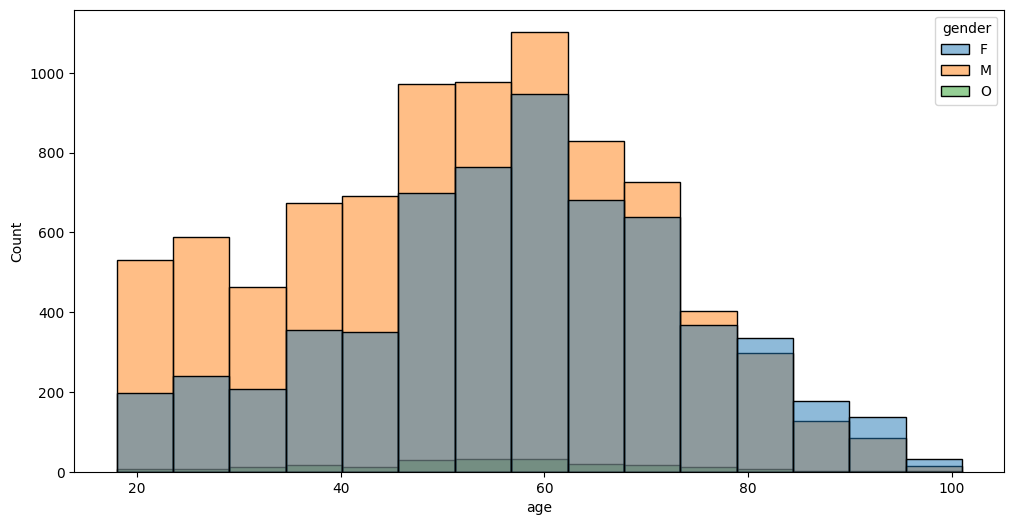

In [39]:
plt.figure(figsize = (12, 6))
sns.histplot(data = profile, x = 'age', bins = 15, hue = 'gender')
plt.show()

In [40]:
pd.pivot_table(data = profile, index = 'gender', values = ['age', 'income'])

,age,income
gender,,
F,57.544950,71306.412139
M,52.116690,61194.601603
O,54.400943,63287.735849


In [41]:
profile['join_year'] = profile.became_member_on.dt.year
profile['join_month'] = profile.became_member_on.dt.month

C:\Users\94dng\AppData\Local\Temp\ipykernel_7396\865360363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile['join_year'] = profile.became_member_on.dt.year
C:\Users\94dng\AppData\Local\Temp\ipykernel_7396\865360363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile['join_month'] = profile.became_member_on.dt.month


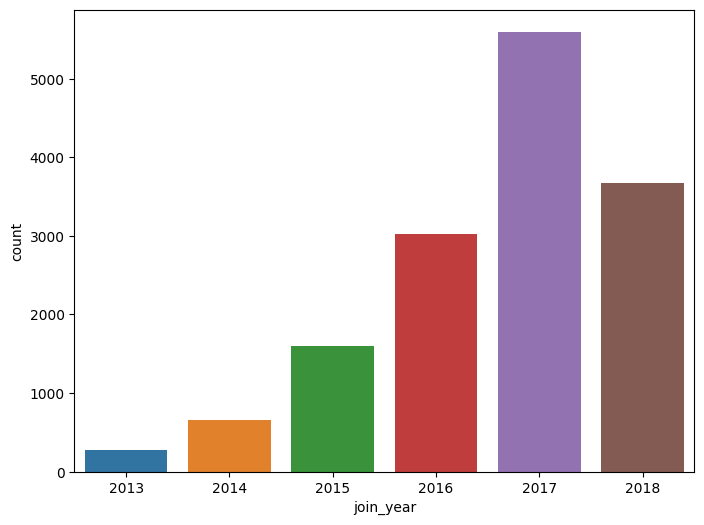

In [42]:
plt.figure(figsize = (8, 6))
sns.countplot(data = profile, x = 'join_year')
plt.show()

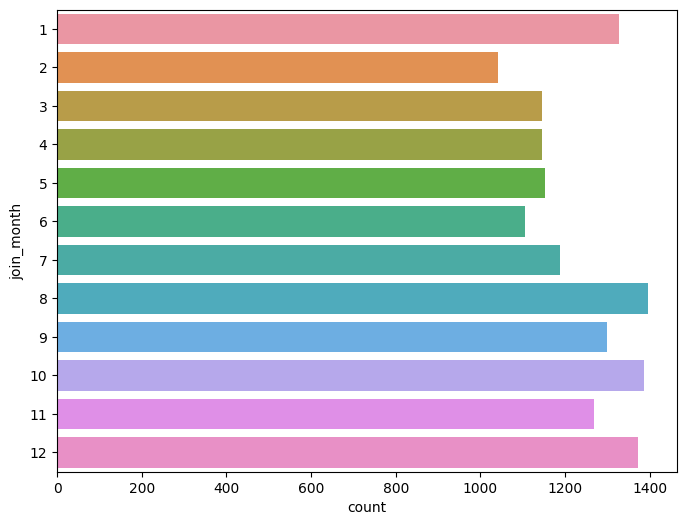

In [43]:
plt.figure(figsize = (8, 6))
sns.countplot(data = profile, y = 'join_month')
plt.show()

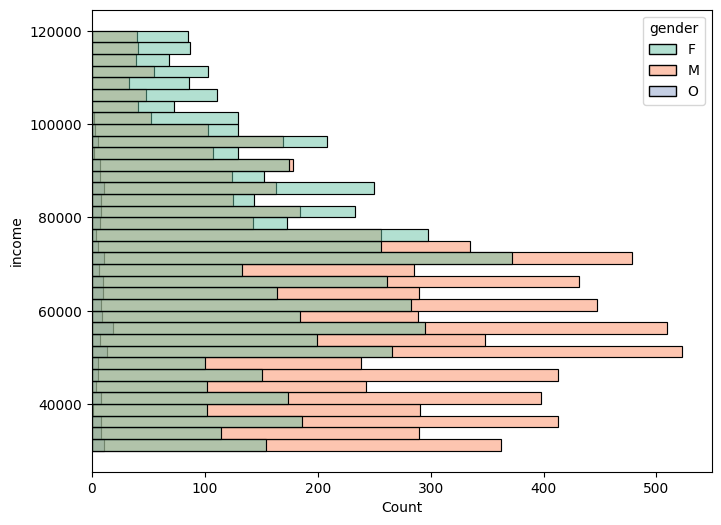

In [58]:
# 수입에 대한 분석
plt.figure(figsize = (8, 6))
sns.histplot(data=profile, y='income', hue='gender', palette='Set2')
plt.show()

In [53]:
pd.pivot_table(data = profile, index = 'gender', values = ['income'])

,income
gender,
F,71306.412139
M,61194.601603
O,63287.735849


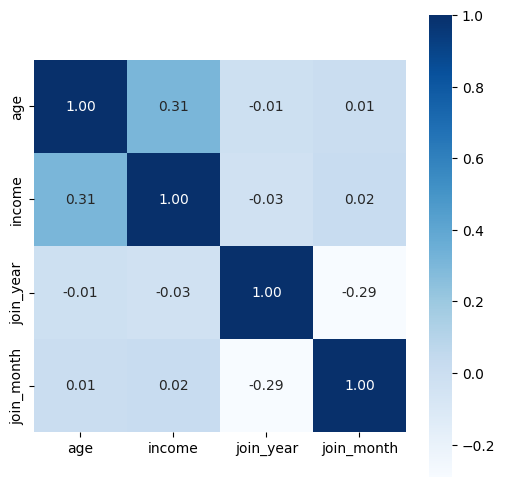

In [62]:
plt.figure(figsize = (6, 6))
sns.heatmap(data = profile.corr(), cmap = 'Blues', square = True, annot = True, fmt = '.2f')
plt.show()

In [63]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


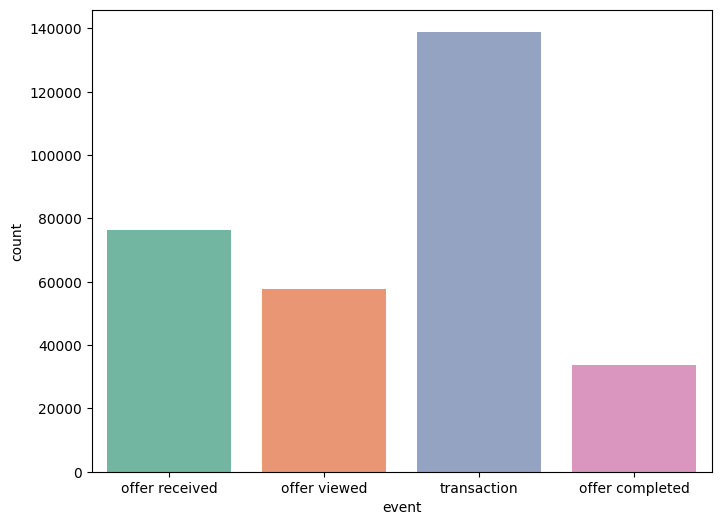

In [64]:
plt.figure(figsize = (8, 6))
sns.countplot(data = transcript, x = 'event', palette = 'Set2')
plt.show()

In [65]:
pd.pivot_table(data = transcript, index = 'event', values = 'time')

,time
event,
offer completed,401.052801
offer received,332.579519
offer viewed,354.290515
transaction,381.584334


In [72]:
temp = sorted(transcript.time.value_counts().head(6).index)
print(temp)
for i in range(len(temp) - 1):
    print(temp[i + 1] - temp[i], end = ' ')

[0, 168, 336, 408, 504, 576]
168 168 72 96 72 

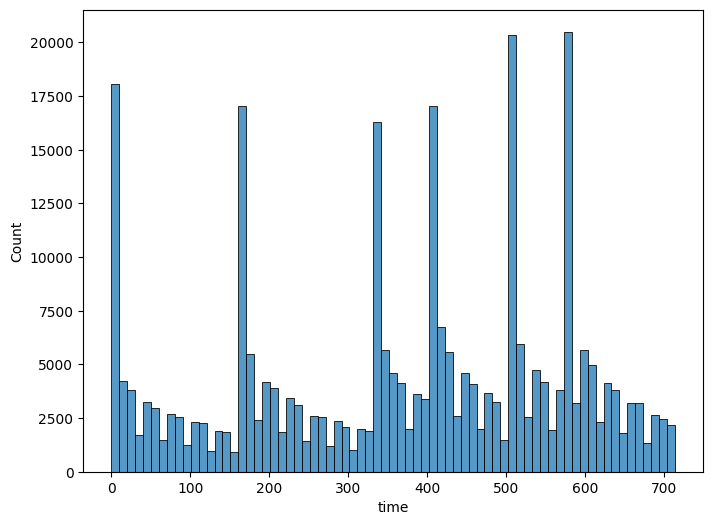

In [66]:
plt.figure(figsize = (8, 6))
sns.histplot(data = transcript, x = 'time')
plt.show()

In [73]:
temp_df = transcript[transcript.time.isin(temp)]
temp_df

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
262132,08eb126ad33f447ca3ad076482445c05,transaction,{'amount': 16.93},576
262133,1b4df4b48bf64727a4c445909aea1251,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},576
262134,ff737c250d2343729ade04c4f6eb1001,transaction,{'amount': 4.78},576
262135,400d0536e8794cbb855b0d882d67cbda,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},576


In [74]:
temp_df.event.value_counts()

offer received     76277
offer viewed       12810
transaction         6841
offer completed     2952
Name: event, dtype: int64

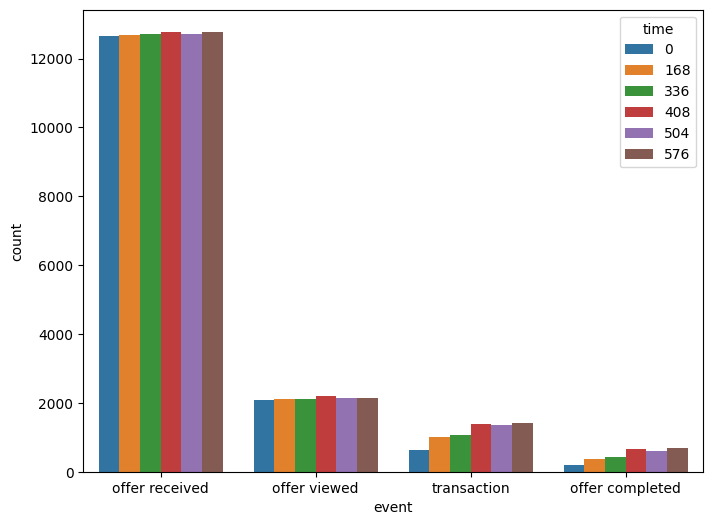

In [76]:
plt.figure(figsize = (8, 6))
sns.countplot(data = temp_df, x = 'event', hue = 'time')
plt.show()

## Kaggle Survey

In [78]:
pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings('ignore')

In [81]:
survey = pd.read_csv('./kaggle/kaggle_survey_2021_responses.csv')
survey

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [84]:
survey.iloc[ : , : 15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Time from Start to Finish (seconds)  25974 non-null  object
 1   Q1                                   25974 non-null  object
 2   Q2                                   25974 non-null  object
 3   Q3                                   25974 non-null  object
 4   Q4                                   25974 non-null  object
 5   Q5                                   25974 non-null  object
 6   Q6                                   25974 non-null  object
 7   Q7_Part_1                            21861 non-null  object
 8   Q7_Part_2                            5335 non-null   object
 9   Q7_Part_3                            10757 non-null  object
 10  Q7_Part_4                            4710 non-null   object
 11  Q7_Part_5                            5536

In [85]:
survey.iloc[ : , : 7]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years
...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years


In [96]:
#survey.Q3.value_counts()
#survey.Q3.unique()
survey[survey.Q3.str.contains('Korea')].Q3.value_counts()

South Korea    359
Name: Q3, dtype: int64

In [99]:
korean = survey[survey.Q3.str.contains('Korea')]
korean

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
276,509,22-24,Man,South Korea,Bachelor’s degree,Other,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,997,50-54,Man,South Korea,Master’s degree,Program/Project Manager,20+ years,Python,NaN,SQL,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,670,30-34,Man,South Korea,Bachelor’s degree,Student,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
482,948,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
492,756,45-49,Man,South Korea,Master’s degree,Currently not employed,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25497,339,25-29,Man,South Korea,Master’s degree,Student,3-5 years,Python,NaN,SQL,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25628,142,25-29,Man,South Korea,Bachelor’s degree,Machine Learning Engineer,< 1 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25842,12540,25-29,Man,South Korea,Master’s degree,Data Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25867,524,45-49,Prefer not to say,South Korea,Doctoral degree,Research Scientist,5-10 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
korean.Q2.value_counts()

Man                  283
Woman                 72
Prefer not to say      4
Name: Q2, dtype: int64

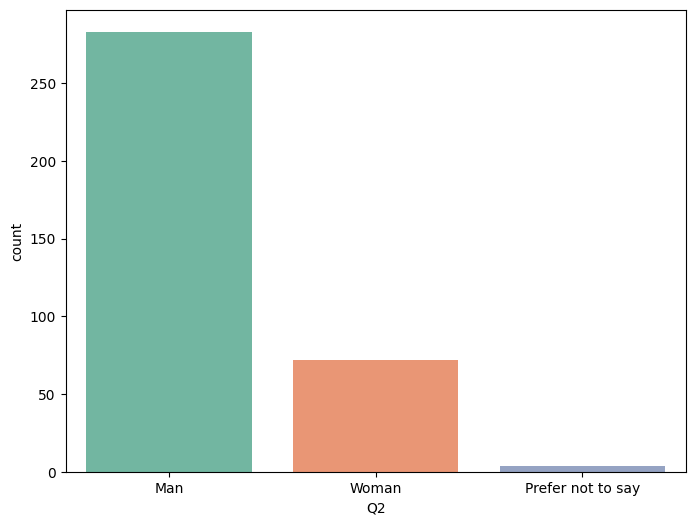

In [100]:
plt.figure(figsize = (8, 6))
sns.countplot(data = korean, x = 'Q2', palette = 'Set2')
plt.show()

In [102]:
korean.Q4.value_counts()

Bachelor’s degree                                                    127
Master’s degree                                                       92
Doctoral degree                                                       55
Some college/university study without earning a bachelor’s degree     52
No formal education past high school                                  15
I prefer not to answer                                                12
Professional doctorate                                                 6
Name: Q4, dtype: int64

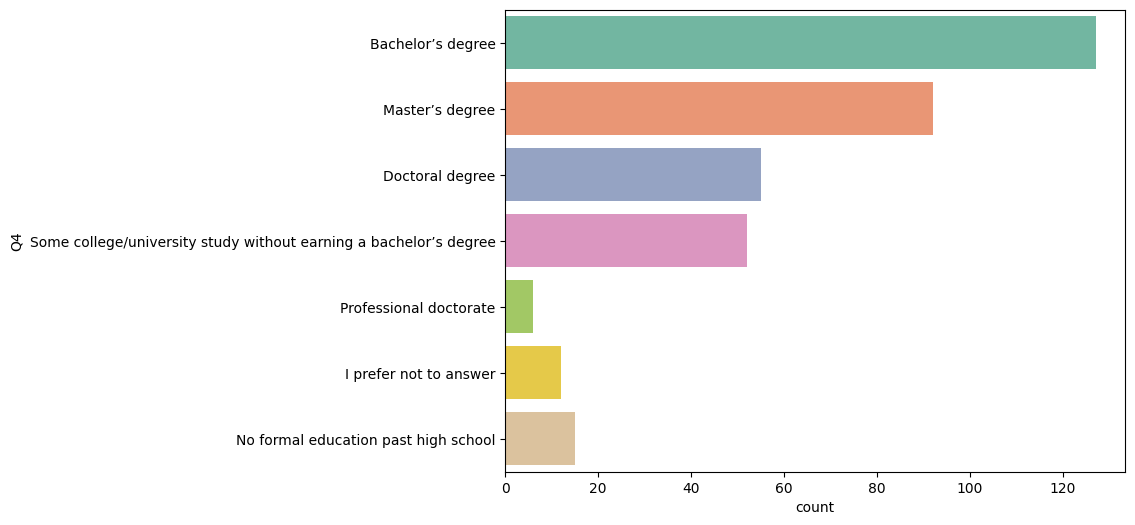

In [106]:
plt.figure(figsize = (8, 6))
sns.countplot(data = korean, y = 'Q4', palette = 'Set2')
plt.show()

In [115]:
countries = pd.pivot_table(data = survey.loc[1 : , ['Q3', 'Q4']], index = 'Q3', columns = 'Q4', aggfunc = {'Q4':'count'}, fill_value=0)
countries

Q4  \
Q4                                                 Bachelor’s degree   
Q3                                                                     
Algeria                                                            3   
Argentina                                                         47   
Australia                                                         79   
Austria                                                           10   
Bangladesh                                                       172   
Belarus                                                           19   
Belgium                                                            9   
Brazil                                                           285   
Canada                                                           104   
Chile                                                             39   
China                                                            217   
Colombia                                                          84   
Czech Republic                                                    10   
Denmark                                                            8   
Ecuador                                                           14   
Egypt                                                            292   
Ethiopia                                                          13   
France                                                            21   
Germany                                                           68   
Ghana                                                             49   
Greece                                                            19   
Hong Kong (S.A.R.)                                                26   
I do not wish to disclose my location                             17   
India                                                           4008   
Indonesia                                                        227   
Iran, Islamic Republic of...                                      47   
Iraq                                                               7   
Ireland                                                           17   
Israel                                                            36   
Italy                                                             49   
Japan                                                            241   
Kazakhstan                                                        18   
Kenya                                                            164   
Malaysia                                                          78   
Mexico                                                            89   
Morocco                                                           15   
Nepal                                                             35   
Netherlands                                                       34   
Nigeria                                                          363   
Norway                                                            10   
Other                                                            420   
Pakistan                                                         237   
Peru                                                              41   
Philippines                                                       59   
Poland                                                            43   
Portugal                                                          21   
Romania                                                           10   
Russia                                                           206   
Saudi Arabia                                                      42   
Singapore                                                         84   
South Africa                                                      63   
South Korea                                                      127   
Spain                                                             86   
Sri Lanka                         

In [117]:
usa = countries.loc['United States of America']
canada = countries.loc['Canada']

In [118]:
display(usa)
display(canada)

    Q4                                                               
Q4  Bachelor’s degree                                                     714
    Doctoral degree                                                       436
    I prefer not to answer                                                 30
    Master’s degree                                                      1235
    No formal education past high school                                   18
    Professional doctorate                                                 45
    Some college/university study without earning a bachelor’s degree     172
Name: United States of America, dtype: int64

    Q4                                                               
Q4  Bachelor’s degree                                                    104
    Doctoral degree                                                       57
    I prefer not to answer                                                 5
    Master’s degree                                                      130
    No formal education past high school                                   3
    Professional doctorate                                                 3
    Some college/university study without earning a bachelor’s degree     29
Name: Canada, dtype: int64

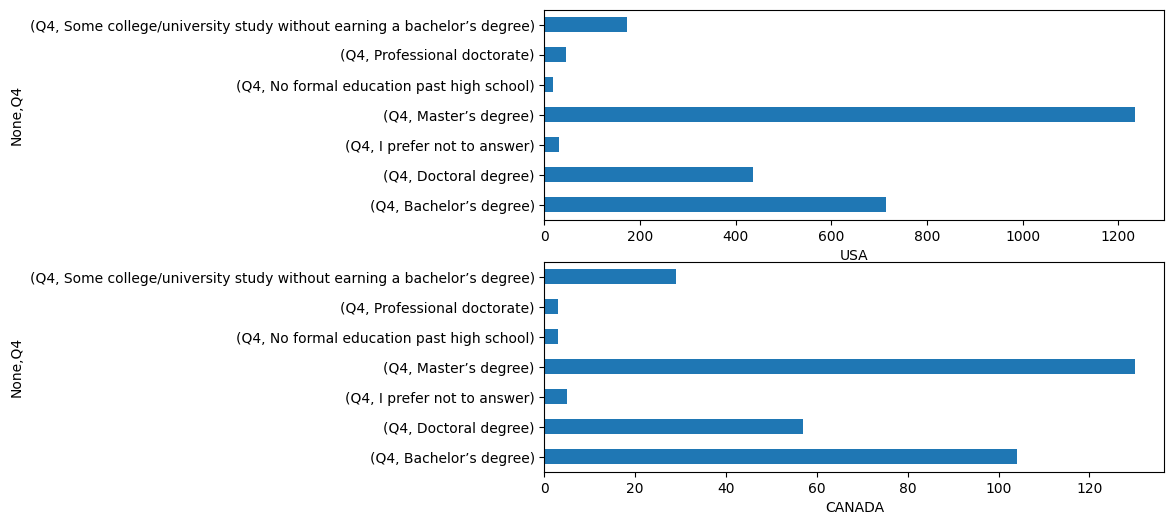

In [127]:
plt.figure(figsize = (8, 6))
plt.subplot(2, 1, 1)
plt.xlabel("USA")
usa.plot(kind = 'barh')
plt.subplot(2, 1, 2)
plt.xlabel("CANADA")
canada.plot(kind = 'barh')
plt.show()

In [141]:
Q7_columns = survey.columns[survey.columns.str.contains("Q7")]

In [145]:
survey[['Q3'] + list(Q7_columns)]

,Q3,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
0,In which country do you currently reside?,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...
1,India,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indonesia,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pakistan,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mexico,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,Egypt,Python,NaN,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25970,China,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,United States of America,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
q7_list = []

for _, row in survey[Q7_columns].loc[1 : , : ].iterrows():
    q7_list.append(row[~row.isnull()].values)
len(q7_list)    

25973

In [164]:
survey['PL'] = ["PL"] + q7_list
survey

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,PL
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",PL
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Python, R]"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"[SQL, C, C++, Java]"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Python, C++, Java]"
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,[Python]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Python, SQL, Javascript, Bash]"
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Python]
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,[]
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Python, SQL]"


In [165]:
korean = survey.loc[survey.Q3 == 'South Korea', ['Q3'] + list(Q7_columns)]
korean

,Q3,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
276,South Korea,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,South Korea,Python,NaN,SQL,NaN,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN
410,South Korea,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,South Korea,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN
492,South Korea,Python,NaN,NaN,C,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25497,South Korea,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25628,South Korea,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25842,South Korea,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25867,South Korea,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
q7_list = []

for _, row in korean[Q7_columns].loc[1 : , : ].iterrows():
    q7_list.append(row[~row.isnull()].values)
q7_list    

[array(['Python'], dtype=object),
 array(['Python', 'SQL', 'Java', 'Javascript'], dtype=object),
 array(['Python'], dtype=object),
 array(['Java', 'Javascript'], dtype=object),
 array(['Python', 'C', 'C++'], dtype=object),
 array(['Python'], dtype=object),
 array(['MATLAB'], dtype=object),
 array(['Python', 'R'], dtype=object),
 array(['Python', 'R', 'Javascript'], dtype=object),
 array(['C'], dtype=object),
 array(['Python', 'R'], dtype=object),
 array(['Python', 'C', 'C++', 'Java'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python', 'C++'], dtype=object),
 array(['Python', 'R', 'SQL', 'C', 'MATLAB'], dtype=object),
 array(['Python', 'R', 'SQL', 'MATLAB'], dtype=object),
 array(['Python', 'R'], dtype=object),
 array(['Python', 'SQL'], dtype=object),
 array(['Python'], dtype=object),
 array(['Python', 'R'], dtype=object),
 array(['SQL'], dtype=object),
 array(['Python', 'SQL', 'C', 'C++', 'Bash', 'MATLA

In [171]:
from collections import Counter
q7_data = []
for row in q7_list:
    q7_data = q7_data + list(row)
counter = Counter(q7_data)
df = pd.DataFrame({"Languages" : counter.keys(), "Count" : counter.values()})
df

,Languages,Count
0,Python,303
1,SQL,89
2,Java,57
3,Javascript,42
4,C,81
5,C++,68
6,MATLAB,38
7,R,89
8,Bash,14
9,None,3


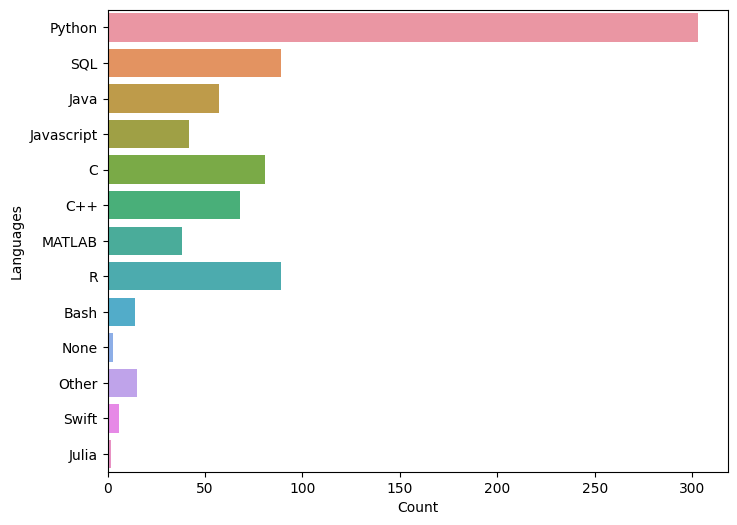

In [178]:
plt.figure(figsize = (8, 6))
sns.barplot(data = df, x = "Count", y = 'Languages')
plt.show()

## 실시간 강의

In [179]:
# concat
import numpy as np

In [181]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

np.vstack([arr1, arr2])

array([[1, 2, 3],
       [4, 5, 6]])

In [182]:
np.hstack([arr1, arr2])

array([1, 2, 3, 4, 5, 6])

In [188]:
# Universal Function
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
L1 = [1, 2, 3]
L2 = [4, 5, 6]

In [189]:
L1 + L2

[1, 2, 3, 4, 5, 6]

In [187]:
v1 + v2

array([5, 7, 9])

In [190]:
v1 - v2

array([-3, -3, -3])

In [191]:
v1 * v2

array([ 4, 10, 18])

In [192]:
v1 / v2

array([0.25, 0.4 , 0.5 ])

In [193]:
v1 @ v2

32

In [195]:
arr1 = np.array([1, 0, 0])
arr2 = np.array([[1, 2, 3], 
                [4, 5, 6]])

In [196]:
arr1 + arr2

array([[2, 2, 3],
       [5, 5, 6]])

In [197]:
arr1 * arr2

array([[1, 0, 0],
       [4, 0, 0]])

In [201]:
1 / arr1

array([ 1., inf, inf])

In [202]:
arr1 + 2

array([3, 2, 2])

In [204]:
# Aggregation functions
np.random.seed(42)
mat = np.random.rand(3, 2)
mat

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452]])

In [206]:
np.min(mat, axis = 0), np.min(mat, axis = 1)

(array([0.15601864, 0.15599452]), array([0.37454012, 0.59865848, 0.15599452]))

In [208]:
np.argmin(mat, axis = 1)

array([0, 1, 1], dtype=int64)

In [209]:
np.argmax(mat, axis = 0)

array([1, 0], dtype=int64)

In [210]:
np.sort(mat, axis = 0)

array([[0.15601864, 0.15599452],
       [0.37454012, 0.59865848],
       [0.73199394, 0.95071431]])

In [211]:
np.argsort(mat, axis = 0)

array([[2, 2],
       [0, 1],
       [1, 0]], dtype=int64)

In [212]:
import pandas as pd